In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading image
img_path = "../images/"
img_name = "apple.jfif"
img = cv.imread(img_path + img_name, cv.IMREAD_GRAYSCALE)
n_rows, n_cols = img.shape[:2]

True

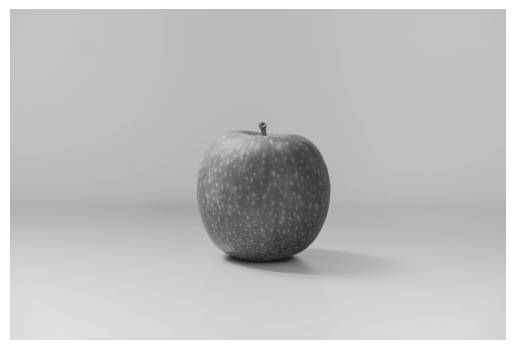

In [5]:
# Show and save source image
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_grayscale.jpg", img)

Thresholding

True

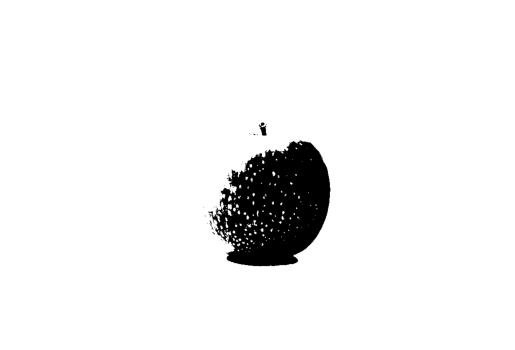

In [27]:
# 1. Arithmetic mean of max and min intensities
t = (np.max(img) - np.min(img)) / 2
ret, bin_img = cv.threshold(img, t, 255, cv.THRESH_BINARY)
# Show and save source image
plt.imshow(bin_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_mean_thres.jpg", bin_img)

True

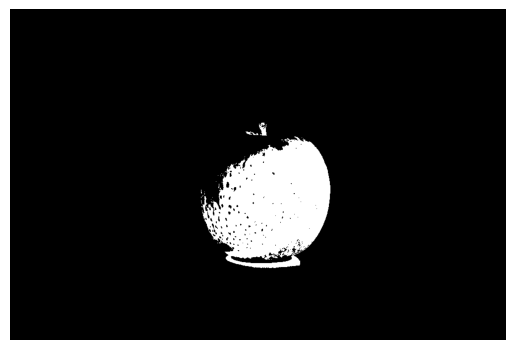

In [26]:
# 2. Double binarization
t1 = 50
t2 = 120
ret, bin_img = cv.threshold(img, t2, 255, cv.THRESH_TOZERO_INV)
ret, bin_img = cv.threshold(bin_img, t1, 255, cv.THRESH_BINARY)
# Show and save source image
plt.imshow(bin_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_double_thres.jpg", bin_img)

106.5


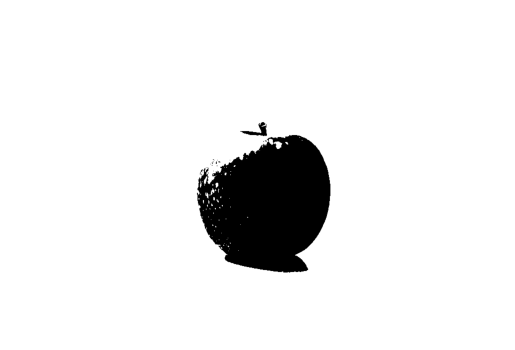

In [30]:
# 3. Otsu binarization
ret, bin_img = cv.threshold(img, 0, 255, cv.THRESH_OTSU)
# Show and save source image
plt.imshow(bin_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_otsu_thres.jpg", bin_img)
print(t)

48.85845066752822


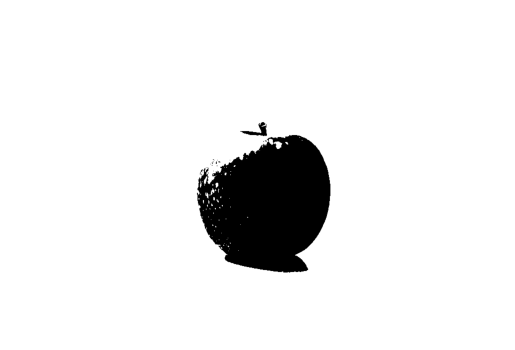

In [32]:
# 2. Based on brightness gradient
mx = np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]])
my = np.array([[0, -1, 0], [0, 0, 0], [0, 1, 0]])
# Compute gradients
grad_x = cv.filter2D(img, -1, mx, borderType=cv.BORDER_REFLECT)
grad_y = cv.filter2D(img, -1, my, borderType=cv.BORDER_REFLECT)
# Find modulus
grad = np.maximum(np.abs(grad_x), np.abs(grad_y))
# Compute t
t = np.sum(np.multiply(grad, img)) / np.sum(grad)

# Show and save source image
plt.imshow(bin_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_grad_br_thres.jpg", bin_img)
print(t)

True

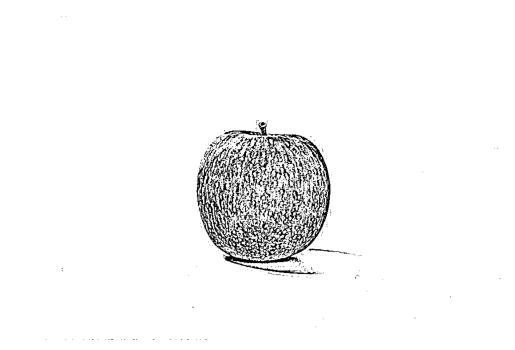

In [37]:
# 4. Adaptive method
bin_img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# Show and save source image
plt.imshow(bin_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_ada_gaus_thres.jpg", bin_img)

True

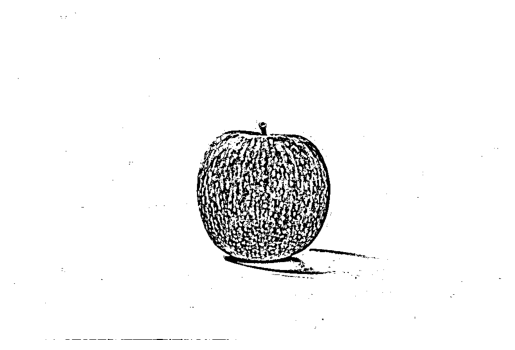

In [36]:
# 4. Adaptive method
bin_img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# Show and save source image
plt.imshow(bin_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + "_ada_med_thres.jpg", bin_img)